# Postprocessing Stretch Test

In [100]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import re
from pandas import ExcelWriter
from datetime import datetime
import os
from functools import reduce 
import numpy as np


#os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\keithley_results\121323-d1114-1-w-tempstab")
os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\okdevice")
path =  os.getcwd()

In [101]:
df = {}
strain = ['0','25','50','75','100']
for st in strain: df[st] = [pd.read_excel(str(os.getcwd())+'\\'+excelfile) for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('-'+st+'%.xls')]

WARNING *** file size (44291) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44301) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44291) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44303) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44307) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44293) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44301) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero

In [32]:
max_values = [[[i['DrainVLeft'].max(),i['DrainVRight'].max()] for i in df[st]] for st in strain]
mean = [np.mean(max_values[i],0) for i in range(len(strain))]
std = [np.std(max_values[i],0) for i in range(len(strain))]
std_diff = [np.std(np.array([max_values[i][j][0] for j in range(len(max_values[i]))])-np.array([max_values[i][j][1] for j in range(len(max_values[i]))]))*1000 for i in range(len(strain))]

In [34]:
import pandas as pd
data = [mean_L, [i[0]*1000 for i in std],mean_R, [i[1]*1000 for i in std],  np.abs(np.array(mean_R)-np.array(mean_L)), std_diff]
r2 = pd.DataFrame(data).transpose().rename(columns = {0: 'Mean_L [mV]', 1: 'std_L [mV]', 2: 'Mean_R [mV]', 3: 'std_R [mV]', 4: 'Diff |Vl-VR| [mV]', 5: 'std diff [mV]'})
r2

,Mean_L [mV],std_L [mV],Mean_R [mV],std_R [mV],Diff |Vl-VR| [mV],std diff [mV]
0,0.000000,419.690276,0.000000,377.734222,0.000000,189.577686
1,536.452336,572.573059,330.724299,563.300036,205.728037,418.046825
2,1727.334289,1180.907524,1668.345161,1627.342953,58.989128,845.620598
3,5117.966297,4028.663079,5140.044791,4209.564087,22.078495,1175.491134
4,10399.767725,6850.711726,10196.419978,6413.549853,203.347747,1224.999046


In [36]:
r2.to_excel(r"C:\Users\Desi\Desktop\TesiStanford\images-results\StretchTestAllRows.xlsx")

Text(0.5, 1.0, 'Mean of values @ 1uA, different orientations, N = 12')

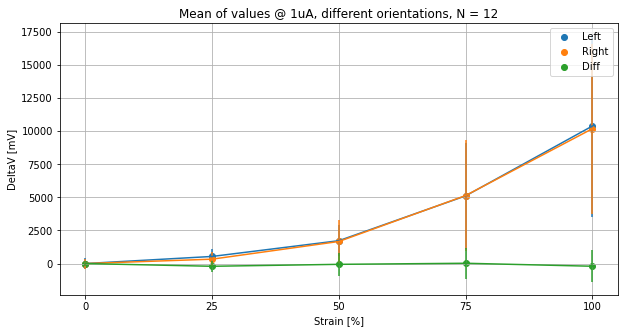

In [33]:
mean_L = np.array([i[0] for i in mean])*1000
mean_L = mean_L- mean_L[0]
mean_R = np.array([i[1] for i in mean])*1000
mean_R = mean_R- mean_R[0]

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(strain,mean_L,label = 'Left')
plt.errorbar(strain,mean_L, yerr = [i[0]*1000 for i in std])
plt.scatter(strain,mean_R,label = 'Right')
plt.errorbar(strain,mean_R, yerr = [i[1]*1000 for i in std])
plt.scatter(strain,np.array(mean_R)-np.array(mean_L), label = 'Diff')
plt.errorbar(strain,np.array(mean_R)-np.array(mean_L), yerr = std_diff)
plt.legend()
plt.grid()
plt.ylabel('DeltaV [mV]')
plt.xlabel('Strain [%]')
plt.title('Mean of values @ 1uA, different orientations, N = 12')

In [37]:
print('Mean +- std @25%:', [round((np.array(mean_R)-np.array(mean_L))[1],3), round(std_diff[1],3)],' mV'  )

Mean +- std @25%: [-205.728, 418.047]  mV


In [38]:
print('Mean +- std @50%:', [round((np.array(mean_R)-np.array(mean_L))[2],3), round(std_diff[2],3)],' mV'  )

Mean +- std @50%: [-58.989, 845.621]  mV


Text(0.5, 1.0, 'Mean of values @ 1uA, different orientations, N = 10')

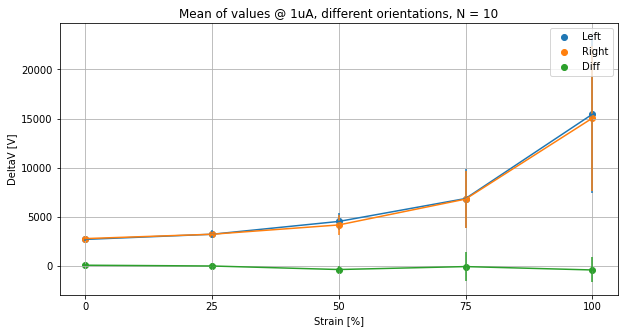

In [5]:
mean_L = np.array([i[0] for i in mean])*1000
mean_R = np.array([i[1] for i in mean])*1000

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(strain,mean_L,label = 'Left')
plt.errorbar(strain,mean_L, yerr = [i[0]*1000 for i in std])
plt.scatter(strain,mean_R,label = 'Right')
plt.errorbar(strain,mean_R, yerr = [i[1]*1000 for i in std])
plt.scatter(strain,np.array(mean_R)-np.array(mean_L), label = 'Diff')
plt.errorbar(strain,np.array(mean_R)-np.array(mean_L), yerr = std_diff)
plt.legend()
plt.grid()
plt.ylabel('DeltaV [V]')
plt.xlabel('Strain [%]')
plt.title('Mean of values @ 1uA, different orientations, N = 10')

In [136]:
os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\okdevice")
path =  os.getcwd()
df_r = {}
row = ['1','2','3','4']
strain = ['0','25','50','75','100']
for r in row: 
    df_r[r] = {}
    for st in strain: df_r[r][st] = [pd.read_excel(str(os.getcwd())+'\\'+excelfile) for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('-'+st+'%.xls') and 'r'+r in excelfile]

WARNING *** file size (44291) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44301) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44307) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (41068) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (41062) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44317) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (44287) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero

In [137]:
max_values_r = {}
mean_r = {}
std_r = {}
std_diff_r = {}
for r in row:
    max_values_r[r] = [[[i['DrainVLeft'].max(),i['DrainVRight'].max()] for i in df_r[r][st]] for st in strain]
    mean_r[r] = [np.mean(max_values_r[r][i],0) for i in range(len(strain))]
    std_r[r] = [np.std(max_values_r[r][i],0) for i in range(len(strain))]
    std_diff_r[r] = [np.std(np.array([max_values_r[r][i][j][0] for j in range(len(max_values_r[r][i]))])-np.array([max_values_r[r][i][j][1] for j in range(len(max_values_r[r][i]))]))*1000 for i in range(len(strain))]

In [138]:
mean_r

{'1': [array([2.85825801, 3.01708231]),
  array([3.5832613 , 3.65621252]),
  array([5.88925123, 6.23981867]),
  array([12.02508068, 12.20278349]),
  array([24.23912811, 22.81816006])],
 '2': [array([2.06599534, 2.17152981]),
  array([2.50504406, 2.50680701]),
  array([3.46389071, 3.34749365]),
  array([4.71972704, 4.77875884]),
  array([6.81306823, 7.26416079])],
 '3': [array([2.9035    , 2.74343801]),
  array([3.14110788, 2.9966499 ]),
  array([4.03692929, 2.96591095]),
  array([5.56798506, 5.40560778]),
  array([14.0758543 , 14.25756264])],
 '4': [array([2.8019942 , 2.89244223]),
  array([3.36601563, 2.93204899]),
  array([3.7580471 , 4.14286098]),
  array([6.12563038, 6.34456269]),
  array([9.89557767, 9.68138266])]}

Mean +- std @25%: for row  1 [72.951, 359.818]  mV
Mean +- std @25%: for row  2 [1.763, 137.426]  mV
Mean +- std @25%: for row  3 [-144.458, 119.692]  mV
Mean +- std @25%: for row  4 [-433.967, 515.763]  mV


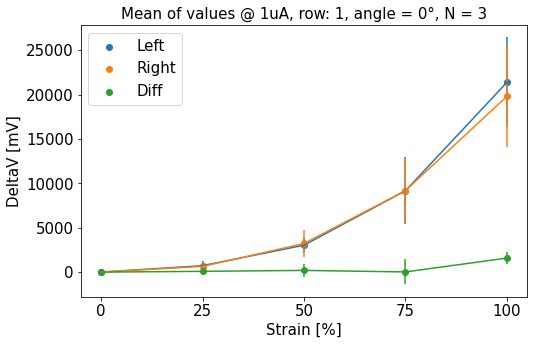

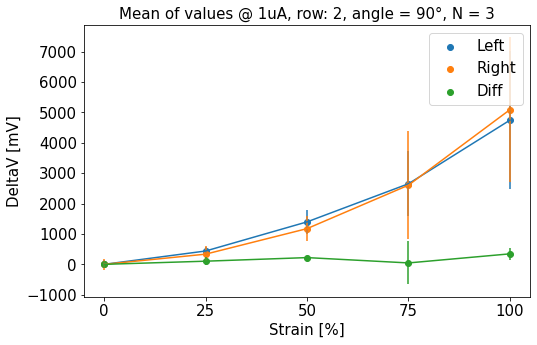

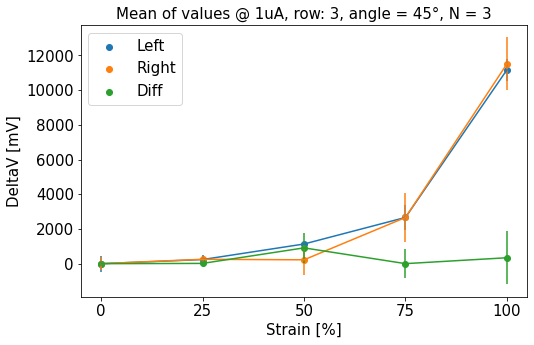

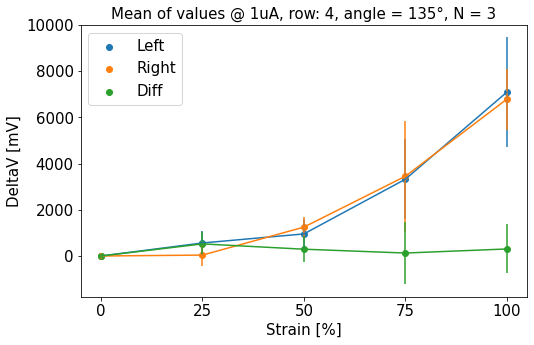

In [73]:
df_rows = {}
mean_L_r = {}
mean_R_r = {}
N = ['3','3', '3','3']
incl = ['0', '90', '45', '135']
for r in row:
    mean_L_r[r] = np.array([i[0] for i in mean_r[r] if not np.isnan(i).all()])*1000
    mean_R_r[r] = np.array([i[1] for i in mean_r[r] if not np.isnan(i).all()])*1000
    data = [mean_L_r[r]-mean_L_r[r][0], [i[0]*1000 for i in std_r[r] if not np.isnan(i).all()],mean_R_r[r]-mean_R_r[r][0], [i[1]*1000 for i in std_r[r] if not np.isnan(i).all()],  np.abs(np.array(mean_R_r[r]-mean_R_r[r][0])-np.array(mean_L_r[r]-mean_L_r[r][0])), np.array(std_diff_r[r])[~np.isnan(np.array(std_diff_r[r]))]]
    df_rows[r] = pd.DataFrame(data).transpose().rename(columns = {0: 'Mean_L [mV]', 1: 'std_L [mV]', 2: 'Mean_R [mV]', 3: 'std_R [mV]', 4: 'Diff |Vl-VR| [mV]', 5: 'std diff [mV]'})

    fig, ax1 = plt.subplots(figsize=(8, 5))
    plt.scatter(strain[:len(mean_L_r[r])],mean_L_r[r]-mean_L_r[r][0],label = 'Left')
    plt.errorbar(strain[:len(mean_L_r[r])],mean_L_r[r]-mean_L_r[r][0], yerr = [i[0]*1000 for i in std_r[r] if not np.isnan(i).all()])
    plt.scatter(strain[:len(mean_L_r[r])],mean_R_r[r]-mean_R_r[r][0],label = 'Right')
    plt.errorbar(strain[:len(mean_L_r[r])],mean_R_r[r]-mean_R_r[r][0], yerr = [i[1]*1000 for i in std_r[r] if not np.isnan(i).all()])
    plt.scatter(strain[:len(mean_L_r[r])],np.abs(np.array(mean_R_r[r]-mean_R_r[r][0])-np.array(mean_L_r[r]-mean_L_r[r][0])), label = 'Diff')
    plt.errorbar(strain[:len(mean_L_r[r])],np.abs(np.array(mean_R_r[r]-mean_R_r[r][0])-np.array(mean_L_r[r]-mean_L_r[r][0])), yerr = np.array(std_diff_r[r])[~np.isnan(np.array(std_diff_r[r]))])
    plt.legend(loc = 0)
    #plt.grid()
    plt.ylabel('DeltaV [mV]',fontsize = 15)
    plt.xlabel('Strain [%]',fontsize = 15)
    plt.rcParams.update({'font.size': 15})
    plt.title('Mean of values @ 1uA, row: '+r+', angle = ' + incl[int(r)-1]+'°, N = '+ N[int(r)-1],fontsize = 15)
    print('Mean +- std @25%: for row ',r, [round((np.array(mean_R_r[r])-np.array(mean_L_r[r]))[1],3), round(std_diff_r[r][1],3)],' mV'  )

In [263]:
df_rows['2'] = r2

In [45]:
from pandas import ExcelWriter
writer = ExcelWriter(r"C:\Users\Desi\Desktop\TesiStanford\images-results\StretchTestDifferentRows.xlsx")
for key in df_rows.keys():
    df_rows[key].to_excel(writer, sheet_name="row #" + str(key))
writer.save()

Mean +- std @25%: for row  1 [72.951, 359.818]  mV
Mean +- std @25%: for row  2 [74.044, 39.311]  mV
Mean +- std @25%: for row  3 [106.941, 443.391]  mV
Mean +- std @25%: for row  4 [-363.108, 496.77]  mV


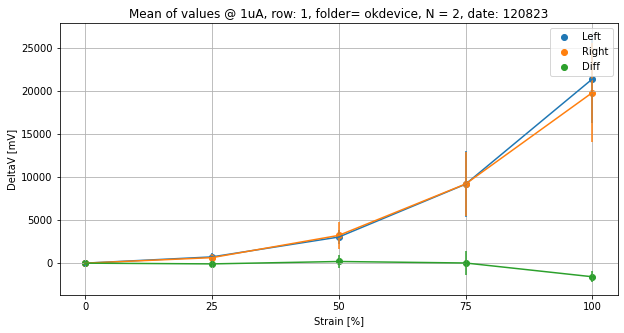

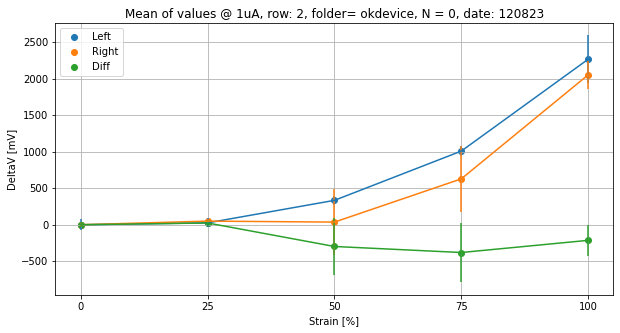

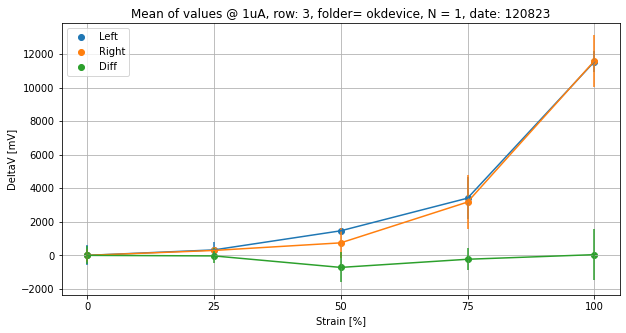

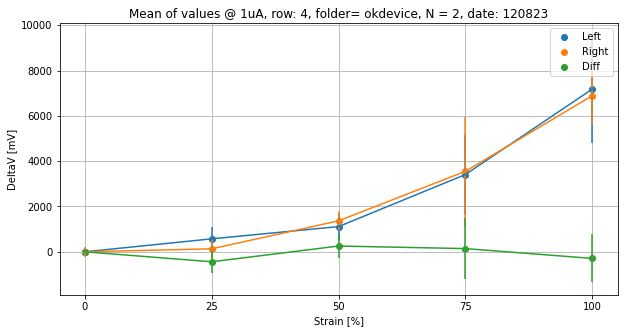

In [103]:
mean_L_r = {}
mean_R_r = {}
N = ['2','0', '1','2']
for r in row:
    mean_L_r[r] = np.array([i[0] for i in mean_r[r] if not np.isnan(i).all()])*1000
    mean_R_r[r] = np.array([i[1] for i in mean_r[r] if not np.isnan(i).all()])*1000
    if not np.isnan(mean_r[r]).all():
        fig, ax1 = plt.subplots(figsize=(10, 5))
        plt.scatter(strain[:len(mean_L_r[r])],mean_L_r[r]-mean_L_r[r][0],label = 'Left')
        plt.errorbar(strain[:len(mean_L_r[r])],mean_L_r[r]-mean_L_r[r][0], yerr = [i[0]*1000 for i in std_r[r] if not np.isnan(i).all()])
        plt.scatter(strain[:len(mean_L_r[r])],mean_R_r[r]-mean_R_r[r][0],label = 'Right')
        plt.errorbar(strain[:len(mean_L_r[r])],mean_R_r[r]-mean_R_r[r][0], yerr = [i[1]*1000 for i in std_r[r] if not np.isnan(i).all()])
        plt.scatter(strain[:len(mean_L_r[r])],np.array(mean_R_r[r]-mean_R_r[r][0])-np.array(mean_L_r[r]-mean_L_r[r][0]), label = 'Diff')
        plt.errorbar(strain[:len(mean_L_r[r])],np.array(mean_R_r[r]-mean_R_r[r][0])-np.array(mean_L_r[r]-mean_L_r[r][0]), yerr = np.array(std_diff_r[r])[~np.isnan(np.array(std_diff_r[r]))])
        plt.legend()
        plt.grid()
        plt.ylabel('DeltaV [mV]')
        plt.xlabel('Strain [%]')
        plt.title('Mean of values @ 1uA, row: '+r+', folder= okdevice, N = '+ N[int(r)-1] + ', date: 120823')
        print('Mean +- std @25%: for row ',r, [round((np.array(mean_R_r[r])-np.array(mean_L_r[r]))[1],3), round(std_diff_r[r][1],3)],' mV'  )

In [85]:
mean_R_r

{'1': array([ 3111.80607478,  3778.29949061,  6913.80039851, 13801.05272929])}

In [89]:
mean_L_r['2']

array([3004.24750646, 2962.03780174, 3023.83820216, 3229.87882296,
       5462.75091171])

In [31]:
np.array(std_diff_r[r])

5

In [32]:
np.array(std_diff_r[r])[~np.isnan(np.array(std_diff_r[r]))]

array([105.46088219, 425.23976538, 535.98942279, 998.66927247])

In [93]:
df_r['2']

{'0': [         Time        DrainI  DrainVLeft         GateI  DrainVRight
  0    0.025684  0.000000e+00    0.265211  0.000000e+00     0.004208
  1    0.051736  1.000000e-08    0.466359  1.000000e-08     0.216776
  2    0.078244  2.000000e-08    0.662690  2.000000e-08     0.449410
  3    0.104759  3.000000e-08    0.764275  3.000000e-08     0.541626
  4    0.131279  4.000000e-08    0.839341  4.000000e-08     0.644811
  ..        ...           ...         ...           ...          ...
  96   2.571217  9.600000e-07    2.927749  9.600000e-07     2.356200
  97   2.597719  9.700000e-07    2.942822  9.700000e-07     2.373402
  98   2.624246  9.800000e-07    2.959547  9.800000e-07     2.358925
  99   2.650756  9.900000e-07    2.976455  9.900000e-07     2.384947
  100  2.677265  1.000000e-06    2.991697  1.000000e-06     2.395426
  
  [101 rows x 5 columns],
           Time        DrainI  DrainVLeft         GateI  DrainVRight
  0    0.025789  0.000000e+00    0.395167  0.000000e+00     0.044202


In [95]:
row = '2'
for i in df_r[row]:
    plt.scatter(strain[:len(mean_L_r[r])],i['DrainVLeft']-i['DrainVRight'],label = 'Left')


TypeError: string indices must be integers

In [97]:
df_r[row]

{'0': [         Time        DrainI  DrainVLeft         GateI  DrainVRight
  0    0.025684  0.000000e+00    0.265211  0.000000e+00     0.004208
  1    0.051736  1.000000e-08    0.466359  1.000000e-08     0.216776
  2    0.078244  2.000000e-08    0.662690  2.000000e-08     0.449410
  3    0.104759  3.000000e-08    0.764275  3.000000e-08     0.541626
  4    0.131279  4.000000e-08    0.839341  4.000000e-08     0.644811
  ..        ...           ...         ...           ...          ...
  96   2.571217  9.600000e-07    2.927749  9.600000e-07     2.356200
  97   2.597719  9.700000e-07    2.942822  9.700000e-07     2.373402
  98   2.624246  9.800000e-07    2.959547  9.800000e-07     2.358925
  99   2.650756  9.900000e-07    2.976455  9.900000e-07     2.384947
  100  2.677265  1.000000e-06    2.991697  1.000000e-06     2.395426
  
  [101 rows x 5 columns],
           Time        DrainI  DrainVLeft         GateI  DrainVRight
  0    0.025789  0.000000e+00    0.395167  0.000000e+00     0.044202


In [145]:
os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\poke")
path =  os.getcwd()

df_poke = {}
strain = ['0','1','2']
print(os.listdir(str(os.getcwd())))

df_poke = [pd.read_excel(str(os.getcwd())+'\\'+excelfile) for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('.xls')]

['d120423-3-r1c3-poke-1.bmp', 'd120423-3-r1c3-poke-1.xls', 'd120423-3-r1c3-poke-2.bmp', 'd120423-3-r1c3-poke-2.xls', 'd120423-3-r1c3-poke-flat.bmp', 'd120423-3-r1c3-poke-flat.xls']
WARNING *** file size (41040) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (41092) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (41072) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [166]:
max_values_r = {}
mean_r = {}
std_r = {}
std_diff_r = {}

max_values_r = [[i['DrainVLeft'].iloc[80],i['DrainVRight'].iloc[80]] for i in df_poke] 
#std_diff_r = [np.std(np.array([max_values_r[r][i][j][0] for j in range(len(max_values_r[r][i]))])-np.array([max_values_r[r][i][j][1] for j in range(len(max_values_r[r][i]))]))*1000 for i in range(len(strain))]

Text(0.5, 1.0, 'Mean of values @ 1uA, different orientations, N = 10')

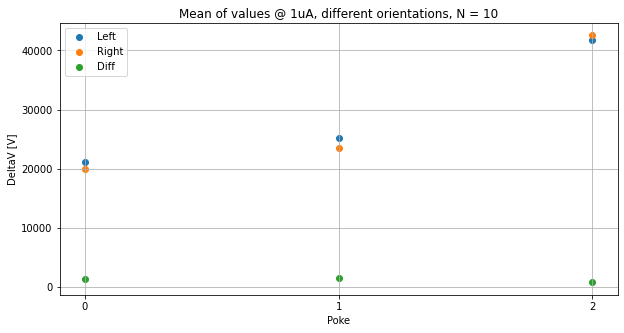

In [170]:
max_values = [max_values_r[2],max_values_r[0], max_values_r[1]]
mean_L = np.array([i[0] for i in max_values])*1000- mean_L[0]
mean_R = np.array([i[1] for i in max_values])*1000 - mean_R[0]

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(strain,mean_L,label = 'Left')
#plt.errorbar(strain,mean_L, yerr = [i[0]*1000 for i in std])
plt.scatter(strain,mean_R,label = 'Right')
#plt.errorbar(strain,mean_R, yerr = [i[1]*1000 for i in std])
plt.scatter(strain,np.abs(np.array(mean_R)-np.array(mean_L)), label = 'Diff')
#plt.errorbar(strain,np.array(mean_R)-np.array(mean_L), yerr = std_diff)
plt.legend()
plt.grid()
plt.ylabel('DeltaV [V]')
plt.xlabel('Poke')
plt.title('Mean of values @ 1uA, different orientations, N = 10')

In [165]:
df_poke[1].iloc[80]

Time           2.678344e+00
DrainI         8.000000e-07
DrainVLeft     4.181094e+01
GateI          8.000000e-07
DrainVRight    4.256210e+01
Name: 80, dtype: float64

### Stability Test